In [1]:
!pip install transformers datasets

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
!pip install -U accelerate>= 0.20.1

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
from datasets import load_dataset
raw_datasets = load_dataset("squad")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [4]:
raw_datasets["train"][1]

{'id': '5733be284776f4190066117f',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'What is in front of the Notre Dame Main Building?',
 'answers': {'text': ['a copper statue of Christ'], 'answer_start': [188]}}

In [5]:
train_df = raw_datasets['train'].to_pandas()

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87599 entries, 0 to 87598
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        87599 non-null  object
 1   title     87599 non-null  object
 2   context   87599 non-null  object
 3   question  87599 non-null  object
 4   answers   87599 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


In [7]:
validation_df = raw_datasets['validation'].to_pandas()

In [8]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10570 non-null  object
 1   title     10570 non-null  object
 2   context   10570 non-null  object
 3   question  10570 non-null  object
 4   answers   10570 non-null  object
dtypes: object(5)
memory usage: 413.0+ KB


In [9]:
train_df.head(20)

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...
5,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,"{'text': ['September 1876'], 'answer_start': [..."
6,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,"{'text': ['twice'], 'answer_start': [441]}"
7,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,"{'text': ['The Observer'], 'answer_start': [598]}"
8,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,"{'text': ['three'], 'answer_start': [126]}"
9,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,"{'text': ['1987'], 'answer_start': [908]}"


In [10]:
validation_df.head(20)

,id,title,context,question,answers
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta..."
5,56be8e613aeaaa14008c90d1,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,"{'text': ['""golden anniversary""', 'gold-themed..."
6,56be8e613aeaaa14008c90d2,Super_Bowl_50,Super Bowl 50 was an American football game to...,What day was the game played on?,"{'text': ['February 7, 2016', 'February 7', 'F..."
7,56be8e613aeaaa14008c90d3,Super_Bowl_50,Super Bowl 50 was an American football game to...,What is the AFC short for?,"{'text': ['American Football Conference', 'Ame..."
8,56bea9923aeaaa14008c91b9,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,"{'text': ['""golden anniversary""', 'gold-themed..."
9,56bea9923aeaaa14008c91ba,Super_Bowl_50,Super Bowl 50 was an American football game to...,What does AFC stand for?,"{'text': ['American Football Conference', 'Ame..."


In [11]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re, string
import nltk
import spacy
from nltk.util import ngrams
from nltk import bigrams, trigrams
import pandas as pd
import numpy as np

In [13]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import unicodedata
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.probability import FreqDist
from collections import Counter
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def sent_tokenizer(column):
  tokenized_sent = sent_tokenize(column)
  return(len(tokenized_sent))

In [16]:
# Apply the sentence tokenizer to the DataFrame columns
train_df['title_sentences'] = train_df['title'].apply(sent_tokenizer)
train_df['question_sentences'] = train_df['question'].apply(sent_tokenizer)
train_df['context_sentences'] = train_df['context'].apply(sent_tokenizer)

In [17]:
# Function to tokenize sentences
def sent_tokenizer(text):
    return sent_tokenize(text)

# Function to tokenize words and return the length of the tokenized list
def word_tokenizer(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Join list of sentences into a single string
    tokenized_word = word_tokenize(text)
    return len(tokenized_word)

# Apply the sentence tokenizer to the DataFrame columns
train_df['title_sentences'] = train_df['title'].apply(sent_tokenizer)
train_df['question_sentences'] = train_df['question'].apply(sent_tokenizer)
train_df['context_sentences'] = train_df['context'].apply(sent_tokenizer)

# Count the number of sentences
train_df['title_sentence_count'] = train_df['title_sentences'].apply(len)
train_df['question_sentence_count'] = train_df['question_sentences'].apply(len)
train_df['context_sentence_count'] = train_df['context_sentences'].apply(len)

# Join sentences back into a single string before applying word tokenizer
train_df['title_word_count'] = train_df['title_sentences'].apply(lambda x: word_tokenizer(' '.join(x)))
train_df['question_word_count'] = train_df['question_sentences'].apply(lambda x: word_tokenizer(' '.join(x)))
train_df['context_word_count'] = train_df['context_sentences'].apply(lambda x: word_tokenizer(' '.join(x)))

In [18]:
train_df.head(10)

,id,title,context,question,answers,title_sentences,question_sentences,context_sentences,title_sentence_count,question_sentence_count,context_sentence_count,title_word_count,question_word_count,context_word_count
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",[University_of_Notre_Dame],[To whom did the Virgin Mary allegedly appear ...,"[Architecturally, the school has a Catholic ch...",1,1,7,1,14,142
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",[University_of_Notre_Dame],[What is in front of the Notre Dame Main Build...,"[Architecturally, the school has a Catholic ch...",1,1,7,1,11,142
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",[University_of_Notre_Dame],[The Basilica of the Sacred heart at Notre Dam...,"[Architecturally, the school has a Catholic ch...",1,1,7,1,15,142
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,[University_of_Notre_Dame],[What is the Grotto at Notre Dame?],"[Architecturally, the school has a Catholic ch...",1,1,7,1,8,142
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,[University_of_Notre_Dame],[What sits on top of the Main Building at Notr...,"[Architecturally, the school has a Catholic ch...",1,1,7,1,12,142
5,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,"{'text': ['September 1876'], 'answer_start': [...",[University_of_Notre_Dame],[When did the Scholastic Magazine of Notre dam...,"[As at most other universities, Notre Dame's s...",1,1,11,1,11,249
6,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,"{'text': ['twice'], 'answer_start': [441]}",[University_of_Notre_Dame],[How often is Notre Dame's the Juggler publish...,"[As at most other universities, Notre Dame's s...",1,1,11,1,10,249
7,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,"{'text': ['The Observer'], 'answer_start': [598]}",[University_of_Notre_Dame],[What is the daily student paper at Notre Dame...,"[As at most other universities, Notre Dame's s...",1,1,11,1,11,249
8,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,"{'text': ['three'], 'answer_start': [126]}",[University_of_Notre_Dame],[How many student news papers are found at Not...,"[As at most other universities, Notre Dame's s...",1,1,11,1,11,249
9,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,"{'text': ['1987'], 'answer_start': [908]}",[University_of_Notre_Dame],[In what year did the student paper Common Sen...,"[As at most other universities, Notre Dame's s...",1,1,11,1,15,249


In [19]:
train_df.describe()

,title_sentence_count,question_sentence_count,context_sentence_count,title_word_count,question_word_count,context_word_count
count,87599.0,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000
mean,1.0,1.002763,5.103118,1.247982,11.286738,137.875900
std,0.0,0.057670,2.328610,0.849009,3.723524,56.853254
min,1.0,1.000000,1.000000,1.000000,1.000000,22.000000
25%,1.0,1.000000,4.000000,1.000000,9.000000,102.000000
50%,1.0,1.000000,5.000000,1.000000,11.000000,127.000000
75%,1.0,1.000000,6.000000,1.000000,13.000000,164.000000
max,1.0,5.000000,27.000000,7.000000,60.000000,766.000000


In [20]:
stop_words_list = set(stopwords.words('english'))

def stop_word(column):
    stop = []
    tokenized_words = word_tokenize(column)
    for word in tokenized_words:
        if word.lower() in stop_words_list:
            stop.append(word)
            
    return len(stop)

In [21]:
# Function that creates two new column that holds the stopword legnth present in 'title' and 'description' column
train_df['stop_in_title'] = train_df['title'].apply(stop_word)
train_df['stop_in_question'] = train_df['question'].apply(stop_word)
train_df['stop_in_context'] = train_df['context'].apply(stop_word)

In [22]:
# The lambda function calculates the count of character for 'title' column by removing space using .replace("","")
train_df['title_char_count'] = train_df['title'].apply(lambda x : len(x.replace(" ","")))
train_df['question_char_count'] = train_df['question'].apply(lambda x : len(x.replace(" ","")))
train_df['context_char_count'] = train_df['context'].apply(lambda x : len(x.replace(" ","")))

In [23]:
# Defining punc for removing puncutation from the text
punc = string.punctuation

In [24]:
# Using punc to count len of punctutaion present in 'title' and 'description' column
train_df['title_punc_count'] = train_df['title'].apply(lambda x : len([i for i in x if i in punc]))
train_df['question_punc_count'] = train_df['question'].apply(lambda x : len([i for i in x if i in punc]))
train_df['context_punc_count'] = train_df['context'].apply(lambda x : len([i for i in x if i in punc]))

In [25]:
def process(column):
    tokens = word_tokenize(column.lower())
    tokens = [token for token in tokens if token not in stop_words_list and token not in string.punctuation]
    return tokens

def ngrams_count(column,n):
    tokens = process(column)
    if n==2:
        ngram_tokens = list(bigrams(tokens))
        
    elif n==3:
        ngram_tokens = list(trigrams(tokens))
        
    return len(ngram_tokens)    

In [26]:
train_df['bigram_length'] = (train_df['title'] + ' ' + train_df['question'] + " " + train_df['context']).apply(lambda x: ngrams_count(x, 2))
train_df['trigram_length'] = (train_df['title'] + ' ' + train_df['question']+" " + train_df['context']).apply(lambda x: ngrams_count(x, 3))

In [27]:
train_df.head(10)

,id,title,context,question,answers,title_sentences,question_sentences,context_sentences,title_sentence_count,question_sentence_count,...,stop_in_question,stop_in_context,title_char_count,question_char_count,context_char_count,title_punc_count,question_punc_count,context_punc_count,bigram_length,trigram_length
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",[University_of_Notre_Dame],[To whom did the Virgin Mary allegedly appear ...,"[Architecturally, the school has a Catholic ch...",1,1,...,6,56,24,59,572,3,1,18,78,77
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",[University_of_Notre_Dame],[What is in front of the Notre Dame Main Build...,"[Architecturally, the school has a Catholic ch...",1,1,...,5,56,24,40,572,3,1,18,76,75
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",[University_of_Notre_Dame],[The Basilica of the Sacred heart at Notre Dam...,"[Architecturally, the school has a Catholic ch...",1,1,...,7,56,24,63,572,3,1,18,78,77
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,[University_of_Notre_Dame],[What is the Grotto at Notre Dame?],"[Architecturally, the school has a Catholic ch...",1,1,...,4,56,24,27,572,3,1,18,74,73
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,[University_of_Notre_Dame],[What sits on top of the Main Building at Notr...,"[Architecturally, the school has a Catholic ch...",1,1,...,5,56,24,42,572,3,1,18,77,76
5,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,"{'text': ['September 1876'], 'answer_start': [...",[University_of_Notre_Dame],[When did the Scholastic Magazine of Notre dam...,"[As at most other universities, Notre Dame's s...",1,1,...,4,88,24,55,1190,3,1,35,136,135
6,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,"{'text': ['twice'], 'answer_start': [441]}",[University_of_Notre_Dame],[How often is Notre Dame's the Juggler publish...,"[As at most other universities, Notre Dame's s...",1,1,...,3,88,24,41,1190,3,2,35,136,135
7,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,"{'text': ['The Observer'], 'answer_start': [598]}",[University_of_Notre_Dame],[What is the daily student paper at Notre Dame...,"[As at most other universities, Notre Dame's s...",1,1,...,4,88,24,44,1190,3,1,35,136,135
8,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,"{'text': ['three'], 'answer_start': [126]}",[University_of_Notre_Dame],[How many student news papers are found at Not...,"[As at most other universities, Notre Dame's s...",1,1,...,3,88,24,44,1190,3,1,35,137,136
9,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,"{'text': ['1987'], 'answer_start': [908]}",[University_of_Notre_Dame],[In what year did the student paper Common Sen...,"[As at most other universities, Notre Dame's s...",1,1,...,5,88,24,67,1190,3,1,35,139,138


In [28]:
train_df.describe()

,title_sentence_count,question_sentence_count,context_sentence_count,title_word_count,question_word_count,context_word_count,stop_in_title,stop_in_question,stop_in_context,title_char_count,question_char_count,context_char_count,title_punc_count,question_punc_count,context_punc_count,bigram_length,trigram_length
count,87599.0,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.0,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000,87599.000000
mean,1.0,1.002763,5.103118,1.247982,11.286738,137.875900,0.0,4.629573,47.870136,14.075903,50.173632,635.595509,1.185002,1.314935,20.335849,79.812133,78.812133
std,0.0,0.057670,2.328610,0.849009,3.723524,56.853254,0.0,1.976797,21.460087,8.562778,17.891840,258.778406,1.436359,0.690712,11.184644,30.992729,30.992729
min,1.0,1.000000,1.000000,1.000000,1.000000,22.000000,0.0,0.000000,2.000000,3.000000,1.000000,125.000000,0.000000,0.000000,1.000000,15.000000,14.000000
25%,1.0,1.000000,4.000000,1.000000,9.000000,102.000000,0.0,3.000000,34.000000,8.000000,37.000000,471.000000,0.000000,1.000000,13.000000,60.000000,59.000000
50%,1.0,1.000000,5.000000,1.000000,11.000000,127.000000,0.0,4.000000,44.000000,12.000000,48.000000,585.000000,1.000000,1.000000,18.000000,74.000000,73.000000
75%,1.0,1.000000,6.000000,1.000000,13.000000,164.000000,0.0,6.000000,58.000000,18.000000,60.000000,754.000000,2.000000,1.000000,25.000000,94.000000,93.000000
max,1.0,5.000000,27.000000,7.000000,60.000000,766.000000,0.0,20.000000,240.000000,59.000000,231.000000,3054.000000,8.000000,23.000000,164.000000,423.000000,422.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\3000423282.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_df[column], ax=axes[row, col], fill=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\3000423282.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_df[column], ax=axes[row, col], fill=True)


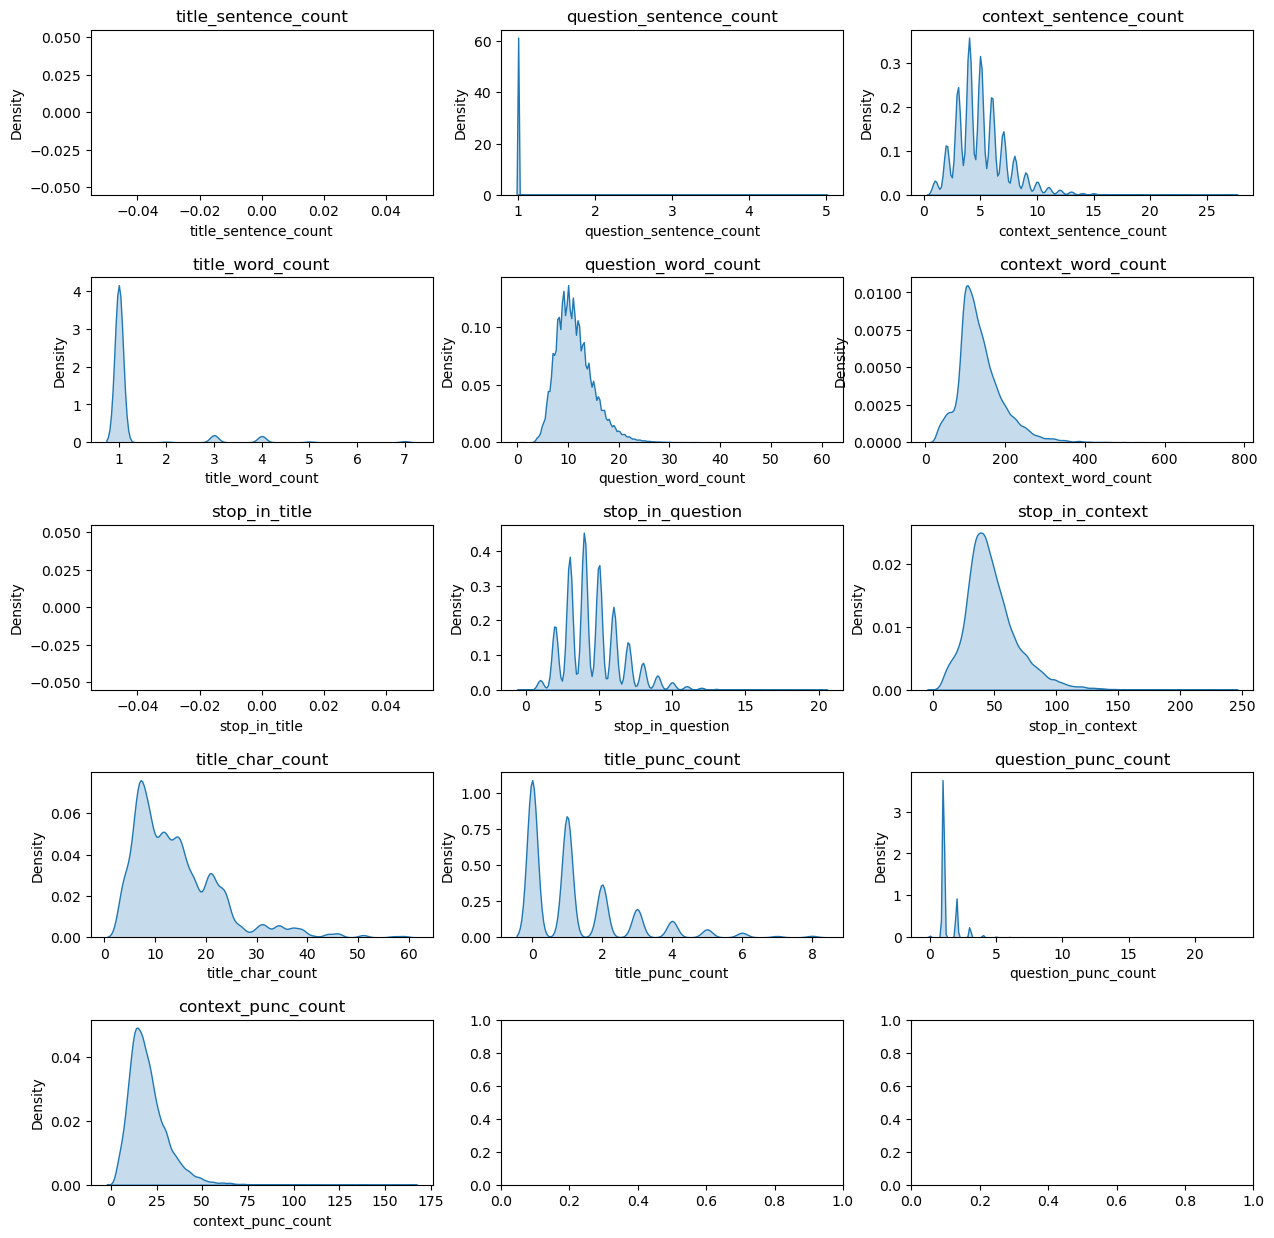

In [29]:
# Define the column names as strings
columns_to_plot = ['title_sentence_count', 'question_sentence_count', 
                   'context_sentence_count', 'title_word_count', 'question_word_count',
                   'context_word_count', 'stop_in_title',
                   'stop_in_question',
                   'stop_in_context',  'title_char_count',  'title_punc_count',  'question_punc_count',  'context_punc_count']

# Create subplots with appropriate layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Plot each column using KDE plots
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    sns.kdeplot(train_df[column], ax=axes[row, col], fill=True)
    axes[row, col].set_title(column)

plt.show()

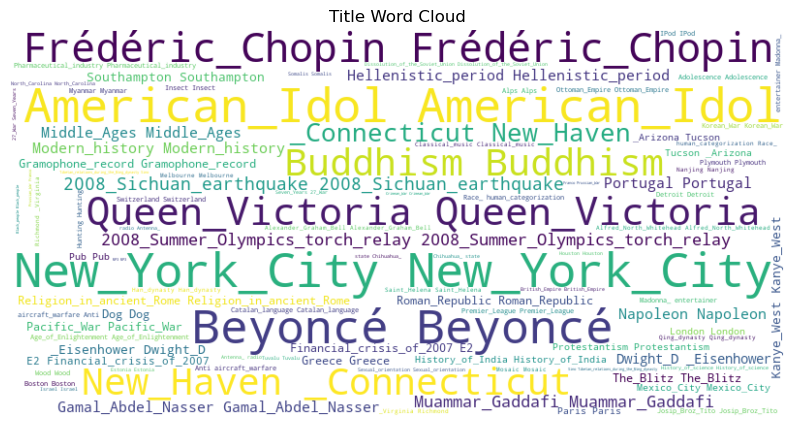

In [30]:
title_text = ' '.join(train_df['title'].astype(str).tolist())

title_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(title_text)
                 
plt.figure(figsize=(10, 7))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Title Word Cloud')
plt.show()

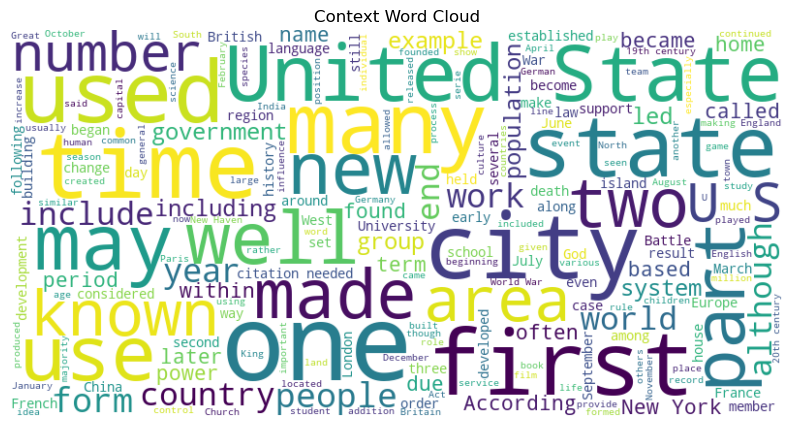

In [31]:
context_text = ' '.join(train_df['context'].astype(str).tolist())

context_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(context_text)
                 
plt.figure(figsize=(10, 7))
plt.imshow(context_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Context Word Cloud')
plt.show()

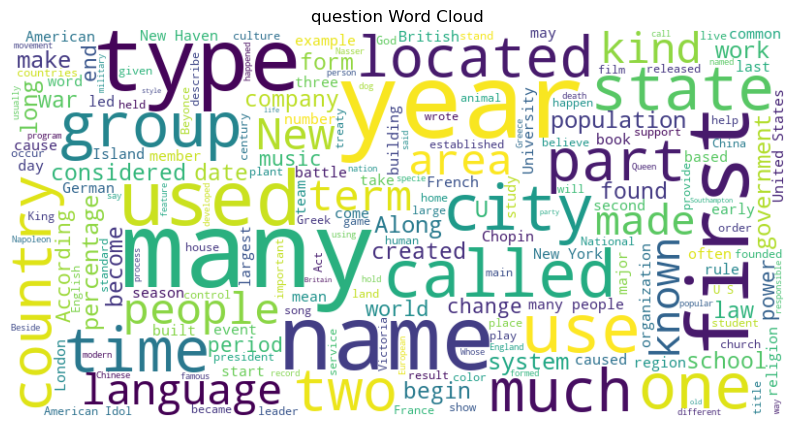

In [32]:
question_text = ' '.join(train_df['question'].astype(str).tolist())

question_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(question_text)
                 
plt.figure(figsize=(10, 7))
plt.imshow(question_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('question Word Cloud')
plt.show()

In [33]:
# Creating new column named 'combined_text' that contains all content of 'title' and 'description' column
train_df['combined_text'] = train_df['title'] + ' ' + train_df['question'] + ' ' + train_df['context'] 

In [34]:
new_df = train_df.head(20000)

In [35]:
combined_text = ' '.join(new_df['context'].astype(str).tolist())

def top_common_words(text, n):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words_list]
    word_counts = Counter(words)
    
    top_words = word_counts.most_common(n)
    return top_words

In [36]:
# n=10 is passed and 10 most common words are extracted along with their counts
top_words_result = top_common_words(combined_text, n=10)

if top_words_result:
    print("Top 10 most common words:")
    for word, count in top_words_result:
        print(f"{word}: {count}")
        
    df_top_words = pd.DataFrame(top_words_result, columns=['Word', 'Count'])

Top 10 most common words:
also: 5782
city: 5592
new: 5150
first: 5060
one: 4781
music: 3009
time: 2994
two: 2952
world: 2906
many: 2715


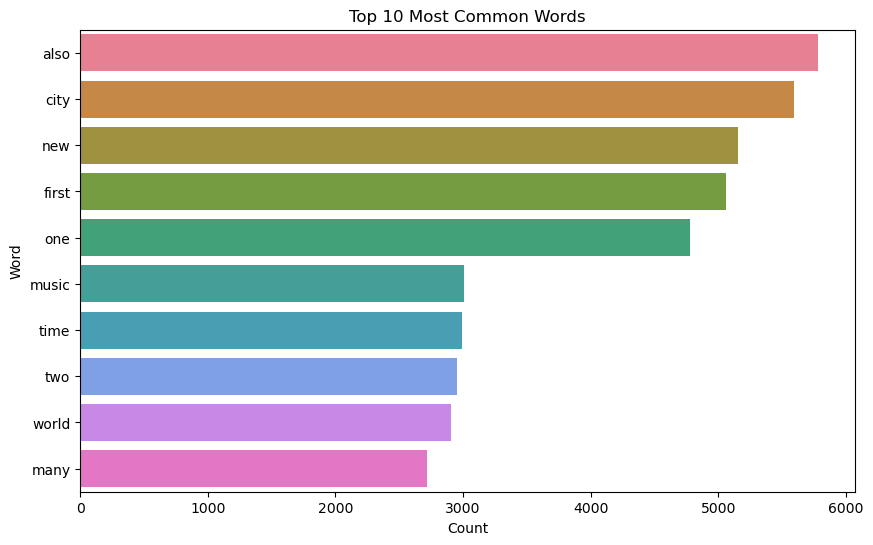

In [37]:
# sns barplot is used to plot the 10 most common words. X axis is count and y is words

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='husl')
plt.title('Top 10 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [38]:
# Fix the new_df['combined_text'] issue
new_df['combined_text'] = new_df['title'].astype(str) + ' ' + new_df['question'].astype(str) + ' ' + new_df['answers'].astype(str)

# Define function to get top n-grams
def top_ngrams(column, n, ngram_range=(1, 1)):
    def process_text(text):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words_list]
        return ' '.join(tokens)
    
    processed_texts = column.apply(process_text)
    
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(processed_texts)
    feature_names = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngram_counts = dict(zip(feature_names, counts))
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:n]
    return sorted_ngrams

C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\3332959430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['combined_text'] = new_df['title'].astype(str) + ' ' + new_df['question'].astype(str) + ' ' + new_df['answers'].astype(str)


In [39]:
# Setting n=10(10 n_grams) ngram_range = (2,2) is for biagram and (3,3) for trigram

top_bigrams = top_ngrams(new_df['combined_text'], 10, ngram_range=(2, 2))
top_trigrams = top_ngrams(new_df['combined_text'], 10, ngram_range=(3, 3))

print("Top Bigrams:")
for bigram in top_bigrams:
    print(bigram)

print("\nTop Trigrams:")
for trigram in top_trigrams:
    print(trigram)

Top Bigrams:
('array array', 7876)
('80 9308', 390)
('e2 80', 390)
('new york', 351)
('american idol', 320)
('million array', 245)
('notre dame', 225)
('located array', 219)
('array million', 203)
('idol array', 190)

Top Trigrams:
('e2 80 9308', 390)
('array million array', 188)
('american idol array', 166)
('new york city', 121)
('year array array', 103)
('located array array', 95)
('called array array', 82)
('notre dame array', 67)
('new york array', 64)
('city array array', 58)


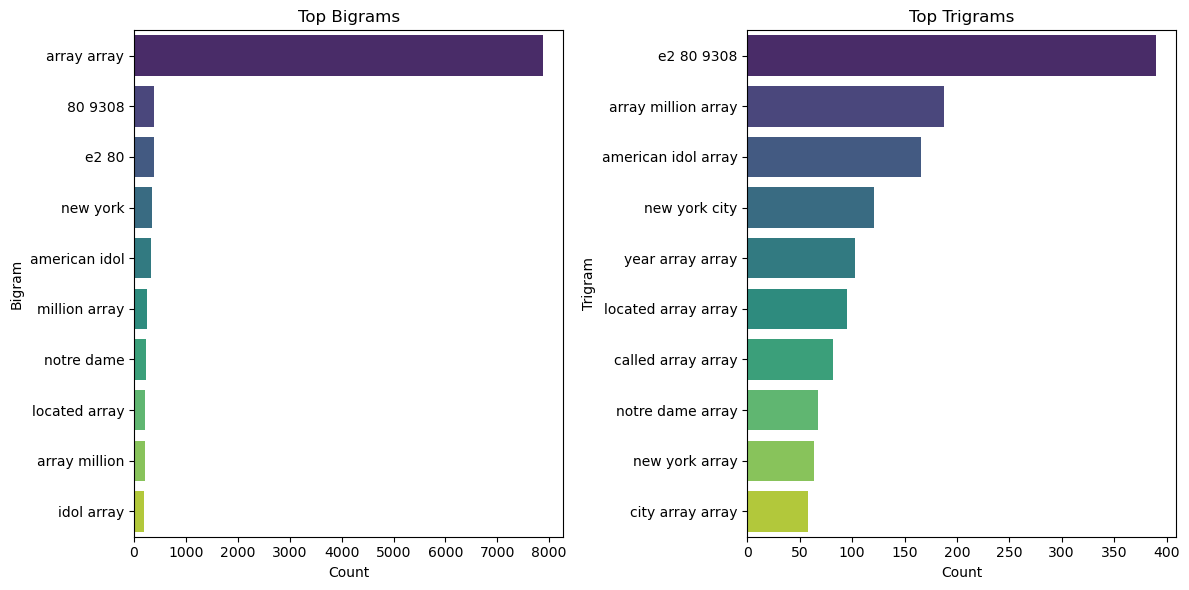

In [40]:
#Creating df1_bigrams and df1_trigrams that contains the top_ngrams and its count

df1_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
df1_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Count'])
plt.figure(figsize=(12, 6))

#Barplot using sns for top bigrams
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Bigram', data=df1_bigrams, palette='viridis')
plt.title('Top Bigrams')

#Barplot usisng seaborn for top Trigrams
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Trigram', data=df1_trigrams, palette='viridis')
plt.title('Top Trigrams')

plt.tight_layout()
plt.show()

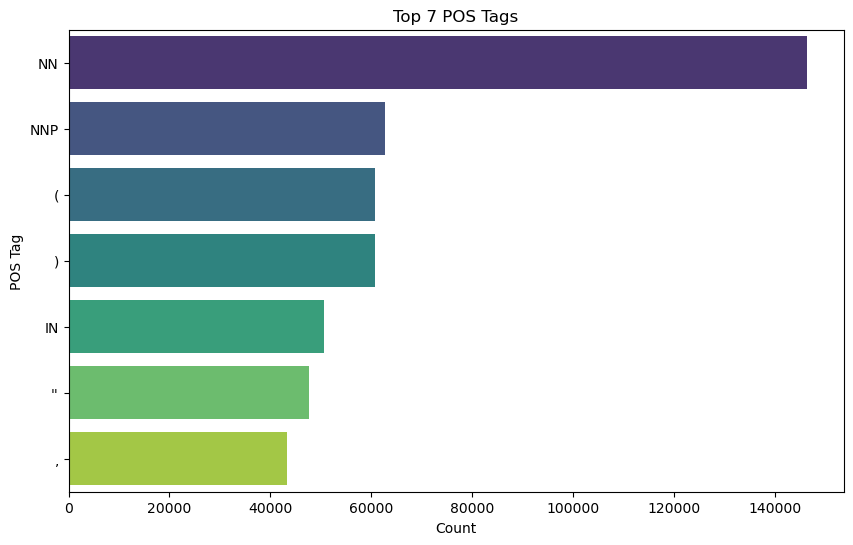

In [41]:
tags = new_df['combined_text'].apply(lambda x: nltk.pos_tag(word_tokenize(x)))
tags = [x[1] for i in tags for x in i]

counter = Counter(tags)

if counter:
    x, y = zip(*counter.most_common(7))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(y), y=list(x), palette='viridis')
    plt.title('Top 7 POS Tags')
    plt.xlabel('Count')
    plt.ylabel('POS Tag')
    plt.show()

else:
    print("No POS tags found in the text.")

In [42]:
class DataPreprocessing:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        
    def preprocessing(self,text):
        lower_text = text.lower()
        manipulated_text = lower_text.translate(str.maketrans("","",string.punctuation))
        token_text = word_tokenize(manipulated_text)
        filtered_text = [text for text in token_text if text not in stop_words_list]
        
        lemmatized_tokens = [self.lemmatizer.lemmatize(text) for text in filtered_text]
        processed_text = ' '.join(lemmatized_tokens)
        
        return processed_text

In [43]:
new_df.head(10)

,id,title,context,question,answers,title_sentences,question_sentences,context_sentences,title_sentence_count,question_sentence_count,...,stop_in_context,title_char_count,question_char_count,context_char_count,title_punc_count,question_punc_count,context_punc_count,bigram_length,trigram_length,combined_text
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",[University_of_Notre_Dame],[To whom did the Virgin Mary allegedly appear ...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,59,572,3,1,18,78,77,University_of_Notre_Dame To whom did the Virgi...
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",[University_of_Notre_Dame],[What is in front of the Notre Dame Main Build...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,40,572,3,1,18,76,75,University_of_Notre_Dame What is in front of t...
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",[University_of_Notre_Dame],[The Basilica of the Sacred heart at Notre Dam...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,63,572,3,1,18,78,77,University_of_Notre_Dame The Basilica of the S...
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,[University_of_Notre_Dame],[What is the Grotto at Notre Dame?],"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,27,572,3,1,18,74,73,University_of_Notre_Dame What is the Grotto at...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,[University_of_Notre_Dame],[What sits on top of the Main Building at Notr...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,42,572,3,1,18,77,76,University_of_Notre_Dame What sits on top of t...
5,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,"{'text': ['September 1876'], 'answer_start': [...",[University_of_Notre_Dame],[When did the Scholastic Magazine of Notre dam...,"[As at most other universities, Notre Dame's s...",1,1,...,88,24,55,1190,3,1,35,136,135,University_of_Notre_Dame When did the Scholast...
6,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,"{'text': ['twice'], 'answer_start': [441]}",[University_of_Notre_Dame],[How often is Notre Dame's the Juggler publish...,"[As at most other universities, Notre Dame's s...",1,1,...,88,24,41,1190,3,2,35,136,135,University_of_Notre_Dame How often is Notre Da...
7,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,"{'text': ['The Observer'], 'answer_start': [598]}",[University_of_Notre_Dame],[What is the daily student paper at Notre Dame...,"[As at most other universities, Notre Dame's s...",1,1,...,88,24,44,1190,3,1,35,136,135,University_of_Notre_Dame What is the daily stu...
8,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,"{'text': ['three'], 'answer_start': [126]}",[University_of_Notre_Dame],[How many student news papers are found at Not...,"[As at most other universities, Notre Dame's s...",1,1,...,88,24,44,1190,3,1,35,137,136,Universi

In [44]:
data_preprocessor = DataPreprocessing()

new_df['title'] = new_df['title'].apply(data_preprocessor.preprocessing)
new_df['question'] = new_df['question'].apply(data_preprocessor.preprocessing)
new_df['context'] = new_df['context'].apply(data_preprocessor.preprocessing)

new_df['combined_text'] = new_df['combined_text'].apply(data_preprocessor.preprocessing)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\2609260822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title'] = new_df['title'].apply(data_preprocessor.preprocessing)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\2609260822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['question'] = new_df['question'].apply(data_preprocessor.preprocessing)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10252\2609260822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [45]:
new_df.head(5)

,id,title,context,question,answers,title_sentences,question_sentences,context_sentences,title_sentence_count,question_sentence_count,...,stop_in_context,title_char_count,question_char_count,context_char_count,title_punc_count,question_punc_count,context_punc_count,bigram_length,trigram_length,combined_text
0,5733be284776f41900661182,universityofnotredame,architecturally school catholic character atop...,virgin mary allegedly appear 1858 lourdes france,"{'text': ['Saint Bernadette Soubirous'], 'answ...",[University_of_Notre_Dame],[To whom did the Virgin Mary allegedly appear ...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,59,572,3,1,18,78,77,universityofnotredame virgin mary allegedly ap...
1,5733be284776f4190066117f,universityofnotredame,architecturally school catholic character atop...,front notre dame main building,"{'text': ['a copper statue of Christ'], 'answe...",[University_of_Notre_Dame],[What is in front of the Notre Dame Main Build...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,40,572,3,1,18,76,75,universityofnotredame front notre dame main bu...
2,5733be284776f41900661180,universityofnotredame,architecturally school catholic character atop...,basilica sacred heart notre dame beside structure,"{'text': ['the Main Building'], 'answer_start'...",[University_of_Notre_Dame],[The Basilica of the Sacred heart at Notre Dam...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,63,572,3,1,18,78,77,universityofnotredame basilica sacred heart no...
3,5733be284776f41900661181,universityofnotredame,architecturally school catholic character atop...,grotto notre dame,{'text': ['a Marian place of prayer and reflec...,[University_of_Notre_Dame],[What is the Grotto at Notre Dame?],"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,27,572,3,1,18,74,73,universityofnotredame grotto notre dame text a...
4,5733be284776f4190066117e,universityofnotredame,architecturally school catholic character atop...,sits top main building notre dame,{'text': ['a golden statue of the Virgin Mary'...,[University_of_Notre_Dame],[What sits on top of the Main Building at Notr...,"[Architecturally, the school has a Catholic ch...",1,1,...,56,24,42,572,3,1,18,77,76,universityofnotredame sits top main building n...


In [46]:
df2= new_df.copy()


In [47]:
vectorizer =CountVectorizer()
combined_text_bow = vectorizer.fit_transform(df2['combined_text'])
print(combined_text_bow.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00071' '007' '00s' ... '渤泥' '緣起' '그리스도']


In [48]:
nlp = spacy.load("en_core_web_sm")

def find_category(matrix, df):
    different_categories = []
    for index, row in matrix.iterrows():
        text = ' '.join([word for word, count in zip(row.index, row.values) if count > 0])
        doc = nlp(text)
    
        different_entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG','EVENT']]
        different_categories.append(different_entities)

    df['different_categories'] = different_categories
    return df[['combined_text', 'different_categories']]

In [49]:
# Defining df and matrx and passing find_category function to find the entity.
bow_df = pd.DataFrame(combined_text_bow.toarray(), columns=vectorizer.get_feature_names_out())
find_category(matrix=bow_df, df=df2)

,combined_text,different_categories
0,universityofnotredame virgin mary allegedly ap...,[]
1,universityofnotredame front notre dame main bu...,"[answerstart, arraya building christ copper]"
2,universityofnotredame basilica sacred heart no...,[answerstart]
3,universityofnotredame grotto notre dame text a...,[grotto marian notre place prayer reflection t...
4,universityofnotredame sits top main building n...,[]
...,...,...
19995,marshallislands alonso de salazar call island ...,[]
19996,marshallislands first person europe observe ma...,[]
19997,marshallislands nationality first european obs...,[]
19998,marshallislands year first european view marsh...,[]


In [50]:
def find_diff_category(matrix, df):
    different_categories = []
    for index, row in matrix.iterrows():
        text = ' '.join([word for word, count in zip(row.index, row.values) if count > 0])
        doc = nlp(text)
        
        # Adding more entity types
        different_entities = [ent.text for ent in doc.ents if ent.label_ in [
            'ORG', 'EVENT', 'PERSON', 'NORP', 'FAC', 'GPE', 'LOC', 'PRODUCT',
            'WORK_OF_ART'
        ]]
        different_categories.append(different_entities)

    df['different_categories'] = different_categories
    return df[['combined_text', 'different_categories']]

In [51]:
# Defining df and matrx and passing find_category function to find the entity.
df_bow = pd.DataFrame(combined_text_bow.toarray(), columns=vectorizer.get_feature_names_out())
find_diff_category(matrix=df_bow, df=df2)

,combined_text,different_categories
0,universityofnotredame virgin mary allegedly ap...,[france]
1,universityofnotredame front notre dame main bu...,"[answerstart, arraya building christ copper]"
2,universityofnotredame basilica sacred heart no...,[answerstart]
3,universityofnotredame grotto notre dame text a...,[grotto marian notre place prayer reflection t...
4,universityofnotredame sits top main building n...,"[arraya building, mary notre]"
...,...,...
19995,marshallislands alonso de salazar call island ...,"[alonso answerstart array262, arraysan bartolome]"
19996,marshallislands first person europe observe ma...,[arrayalonso de dtypeobject europe]
19997,marshallislands nationality first european obs...,"[answerstart array0, european]"
19998,marshallislands year first european view marsh...,"[array1526 array80, european]"


In [52]:
df2['combined_text'].iloc[0]

'universityofnotredame virgin mary allegedly appear 1858 lourdes france text arraysaint bernadette soubirous dtypeobject answerstart array515'

In [53]:
def retrieve_documents(query, matrix, vectorizer, df, num_results):
   
    query_vector = vectorizer.transform([query])
     
    cosine_similarities = cosine_similarity(query_vector, matrix).flatten()

    document_indices = cosine_similarities.argsort()[:-num_results-1:-1]
    return df.iloc[document_indices][['combined_text']]

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:

# Setting user query, matrix, vectorizer,df and total_number of result wanted and performing the function to get output.
query = "who was the first european"
retrieved_documents = retrieve_documents(query, combined_text_bow, vectorizer, df2,5)
print(retrieved_documents)

                                           combined_text
3846   newyorkcity first european visit area nyc text...
19997  marshallislands nationality first european obs...
19950  marshallislands decade european first visit ma...
19998  marshallislands year first european view marsh...
19945  marshallislands year european explorer first s...


In [56]:
df2['combined_text'][3849]

'newyorkcity year spanish expedition visit new york harbor text array1525 dtypeobject answerstart array133'

In [57]:

def elbow_method(x):
    wcss = []
    
    for i in range(1, 16):  
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)

   
    plt.plot(range(1, 16), wcss)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  
    plt.show()

In [58]:
from sklearn.cluster import KMeans

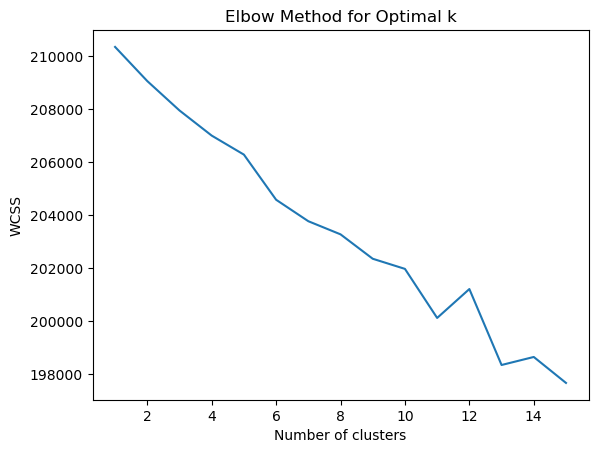

In [59]:
# Plotting elbow method for combined_text_bow
elbow_method(combined_text_bow)

In [60]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init=10)
df2['cluster'] = kmeans.fit_predict(combined_text_bow)

df2[['title', 'context', 'cluster']]

,title,context,cluster
0,universityofnotredame,architecturally school catholic character atop...,2
1,universityofnotredame,architecturally school catholic character atop...,2
2,universityofnotredame,architecturally school catholic character atop...,2
3,universityofnotredame,architecturally school catholic character atop...,2
4,universityofnotredame,architecturally school catholic character atop...,2
...,...,...,...
19995,marshallislands,spanish explorer alonso de salazar first europ...,2
19996,marshallislands,spanish explorer alonso de salazar first europ...,2
19997,marshallislands,spanish explorer alonso de salazar first europ...,2
19998,marshallislands,spanish explorer alonso de salazar first europ...,2


In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_text_bow.toarray())

df2['pca_1'] = X_pca[:, 0]
df2['pca_2'] = X_pca[:, 1]

X_pca_df = pd.DataFrame(data = X_pca, columns =['pca1','pca2'])
X_pca_df.head()

MemoryError: Unable to allocate 3.73 GiB for an array with shape (20000, 25033) and data type float64

In [ ]:
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = df2[df2['cluster'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.show()